In [1]:
## Imports
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from sklearn.metrics import confusion_matrix

In [2]:
## Load data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train = y_train.flatten()
y_test = y_test.flatten()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [3]:
## Build improved model (Functional API + BatchNorm + Dropout)
## CNN model with glorot_uniform everywhere
inputs = Input(shape=(32, 32, 3))

x = Conv2D(32, (3, 3), padding='same', activation='relu',
           kernel_initializer='glorot_uniform')(inputs)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), padding='same', activation='relu',
           kernel_initializer='glorot_uniform')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.25)(x)

x = Conv2D(64, (3, 3), padding='same', activation='relu',
           kernel_initializer='glorot_uniform')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), padding='same', activation='relu',
           kernel_initializer='glorot_uniform')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.25)(x)

x = Conv2D(128, (3, 3), padding='same', activation='relu',
           kernel_initializer='glorot_uniform')(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.4)(x)

x = Flatten()(x)
x = Dense(256, activation='relu', kernel_initializer='glorot_uniform')(x)
x = Dropout(0.5)(x)
outputs = Dense(10, activation='softmax', kernel_initializer='glorot_uniform')(x)

model = Model(inputs=inputs, outputs=outputs)

In [4]:
## Compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [5]:
## Early stopping
callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

In [6]:
## Train
history = model.fit(
    x_train, y_train,
    validation_split=0.1,
    epochs=50,
    batch_size=128,
    callbacks=[callback]
)

Epoch 1/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 343s 954ms/step - accuracy: 0.2594 - loss: 2.1886 - val_accuracy: 0.2384 - val_loss: 3.1422
Epoch 2/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 369s 919ms/step - accuracy: 0.4538 - loss: 1.4882 - val_accuracy: 0.5570 - val_loss: 1.2502
Epoch 3/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 388s 937ms/step - accuracy: 0.5405 - loss: 1.2679 - val_accuracy: 0.6328 - val_loss: 1.1037
Epoch 4/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 373s 911ms/step - accuracy: 0.5976 - loss: 1.1410 - val_accuracy: 0.6684 - val_loss: 0.9849
Epoch 5/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 323s 914ms/step - accuracy: 0.6400 - loss: 1.0311 - val_accuracy: 0.6906 - val_loss: 0.8587
Epoch 6/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 321s 910ms/step - accuracy: 0.6658 - loss: 0.9412 - val_accuracy: 0.7242 - val_loss: 0.7787
Epoch 7/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 322s 914ms/step - accuracy: 0.6902 - loss: 0.8978 - val_accuracy: 0.6576 - val_loss: 1.0303
Epoch 8/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 319s 907ms/step - accuracy: 0.7119 -

In [7]:
## Evaluate
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test accuracy:", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 17s 55ms/step - accuracy: 0.7813 - loss: 0.6538
Test accuracy: 0.7854999899864197


In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
import os

# Path where models will be saved
save_dir = "/content/drive/MyDrive/deep_learning_models"
os.makedirs(save_dir, exist_ok=True)

In [10]:
model.save(os.path.join(save_dir, "cifar10_cnn2.h5"))

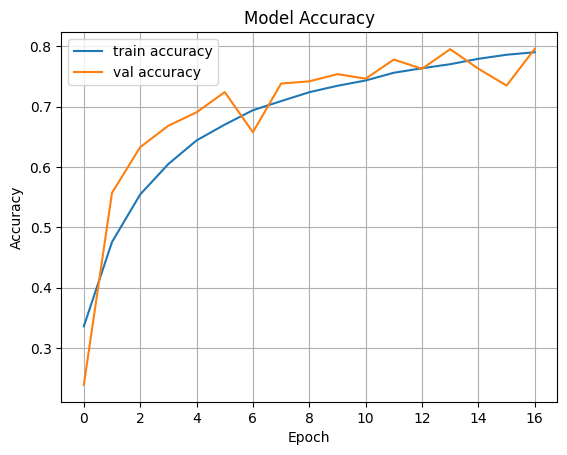

In [11]:
## Accuracy plot
plt.figure()
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

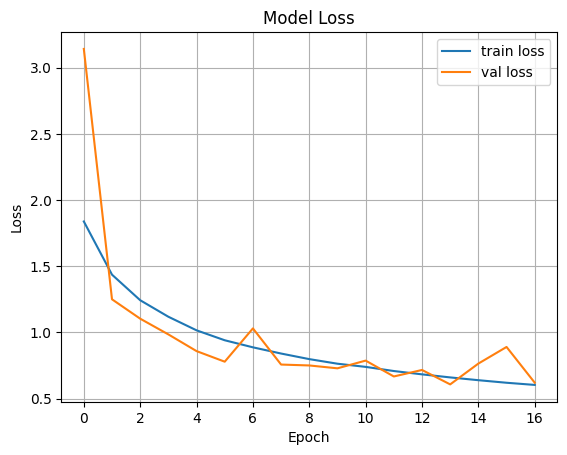

In [12]:
## Loss plot
plt.figure()
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 18s 56ms/step


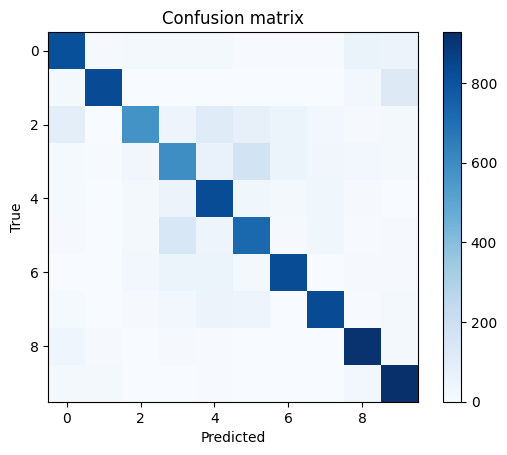

In [13]:
## Confusion Matrix
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test, y_pred_classes)

plt.figure()
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title("Confusion matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.colorbar()
plt.show()